*Проект e-commerce: вариант 1 
Продакт-менеджер Василий попросил вас проанализировать совершенные покупки и ответить на следующие вопросы:*

Начинаем с импортирования всех необходимых библиотек:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt
from datetime import timedelta
from urllib.parse import urlencode
import requests
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import ssl
import pandas as pd
import urllib.request

Для начала работы загрузим данные.

Для создания необходимых ссылок воспользуемся cайтом https://getfile.dokpub.com/

И сразу проверим как она загрузилась.

Таблица с уникальными идентификаторами пользователей:

In [ ]:
url = "https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/QXrVDUoQvFhIcg"
context = ssl._create_unverified_context()
response = urllib.request.urlopen(url, context=context)

df_id = pd.read_csv(response)

'''
#если использовать этот вариант, в кавычках, то возникает ошибка SSL: CERTIFICATE_VERIFY_FAILED
#Она указывает на проблему с проверкой сертификата SSL на моем компьютере. 
df_id = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/QXrVDUoQvFhIcg')'''

df_id.head()  # команда head() покажет первые 5 записей в таблице

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


 olist_customers_datase.csv — таблица с уникальными идентификаторами пользователей. Ее колонки:
 
    customer_id — позаказный идентификатор пользователя

    customer_unique_id —  уникальный идентификатор пользователя  (аналог номера паспорта)

    customer_zip_code_prefix —  почтовый индекс пользователя

    customer_city —  город доставки пользователя

    customer_state —  штат доставки пользователя

Таблица заказов, сразу заменим типы данных в колонках, связанных со временем на временной:

In [ ]:
url = "https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/0zWmh1bYP6REbw"
context = ssl._create_unverified_context()
response = urllib.request.urlopen(url, context=context)

df_orders = pd.read_csv(response,
                        parse_dates=[3,4,5,6,7])

''' #тут наблюдаем точно такую же ошибку как и в предыдщем шаге
df_orders = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/0zWmh1bYP6REbw',
                        parse_dates=[3,4,5,6,7])'''
df_orders.head()  # команда head() покажет первые 5 записей в таблице

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


olist_orders_dataset.csv —  таблица заказов

    order_id —  уникальный идентификатор заказа (номер чека)

    customer_id —  позаказный идентификатор пользователя

    order_status —  статус заказа

    order_purchase_timestamp —  время создания заказа

    order_approved_at —  время подтверждения оплаты заказа

    order_delivered_carrier_date —  время передачи заказа в логистическую службу

    order_delivered_customer_date —  время доставки заказа

    order_estimated_delivery_date —  обещанная дата доставки

Товарные позиции, входящие в заказы, сразу заменим тип данных в колонке, связанной со временем на временной:

In [ ]:
url = "https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/xCsQ0FiC-Ue4Lg"
context = ssl._create_unverified_context()
response = urllib.request.urlopen(url, context=context)

df_products = pd.read_csv(response,
                        parse_dates=['shipping_limit_date'])

'''# и на этом шаге снова повторяется ошибка сертификата
df_products = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/xCsQ0FiC-Ue4Lg',
                          parse_dates=['shipping_limit_date'])'''
df_products.head()  # команда head() покажет первые 5 записей в таблице

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


olist_order_items_dataset.csv —  товарные позиции, входящие в заказы

    order_id —  уникальный идентификатор заказа (номер чека)

    order_item_id —  идентификатор товара внутри одного заказа

    product_id —  ид товара (аналог штрихкода)

    seller_id — ид производителя товара

    shipping_limit_date —  максимальная дата доставки продавцом для передачи заказа партнеру по логистике

    price —  цена за единицу товара

    freight_value —  вес товара

In [ ]:
#  Второй вариант загрузки данных, если первый не сработает, необходимо просто убрать тройные кавычки:

'''
id_url = 'https://disk.yandex.ru/d/QXrVDUoQvFhIcg'
orders_url = 'https://disk.yandex.ru/d/0zWmh1bYP6REbw'
products_url = 'https://disk.yandex.ru/d/xCsQ0FiC-Ue4Lg'


def get_yandex(public_key):
    base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
    final_url = base_url + urlencode(dict(public_key=public_key))
    response = requests.get(final_url)
    download_url = response.json()['href']
    return download_url


df_id = pd.read_csv(get_yandex(id_url))
df_orders = pd.read_csv(get_yandex(orders_url), parse_dates=[3, 4, 5, 6, 7])
df_products = pd.read_csv(get_yandex(products_url), parse_dates=[4])'''

1:80: E501 line too long (102 > 79 characters)
10:80: E501 line too long (80 > 79 characters)


Посмотрим на типы данных в таблицах, количество строк и колонок и пропущенные значения:

In [ ]:
df_id.info()  # команда info выводит нам информацию по нашему датасету: количество строк и столбцов, 
              # количество пропущенных значений и типы данных колонок

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


В таблице с уникальными идентификаторами пользователей 99441 строка и 5 столбцов, все типы данных совпадают с описанием колонок, пропущенных значений нет.

In [ ]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


В таблице заказов 99441 строка и 8 столбцов, все типы данных совпадают с описанием колонок, наблюдаются пропущенные значения в столбце 'order_approved_at', 'order_delivered_carrier_date' и 'order_delivered_customer_date'. Посчитаем количество пропущенных значений в каждом столбце:

In [ ]:
df_orders.isnull().sum()  # команда isnull() заменит все значения в датасете на True, где пропущено значение 
                          # и False, где значение есть, затем просто просуммируем булевые значения и узнаем где 
                          # сколько пропущенных значений

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [ ]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


В таблице с товарными позициями, входящими в заказы 112650 строк и 7 колонок, все типы данных совпадают с описанием колонок, пропущенных значений нет.

#### Задание № 1. Сколько у нас пользователей, которые совершили покупку только один раз? ####

Уникальные статусы заказов в таблице df_orders:

    created —  создан
    approved —  подтверждён
    invoiced —  выставлен счёт
    processing —  в процессе сборки заказа
    shipped —  отгружен со склада
    delivered —  доставлен пользователю
    unavailable —  недоступен
    canceled —  отменён
    
Всего уникальных статусов в таблице df_orders у нас 8. С точки зрения покупателя фактом покупки будем считать факт перехода в собственность товара, а значит статус 'delivered'.

In [ ]:
# Проверим количество по статусу заказов
df_orders.order_status.value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

Объединяем две таблицы, с уникальными идентификаторами пользователей и таблицу заказов

In [ ]:
df_id_orders = df_id.merge(df_orders, on='customer_id')

In [ ]:
df_id_orders.query("order_status == 'delivered'") \
    .groupby('customer_unique_id', as_index=False) \
    .agg({'order_id':'count'}) \
    .query("order_id == 1") \
    .count()

customer_unique_id    90557
order_id              90557
dtype: int64

#### 90557 пользователей совершили покупку только один раз ####

#### 2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)? ####

Посмотрим на заказы со статусом delivered, но с отсутствующей датой доставки.

In [ ]:
df_orders.query('order_status == "delivered" & order_delivered_customer_date == ""')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,NaT,2017-12-18
20618,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,NaT,2018-07-16
43834,2ebdfc4f15f23b91474edf87475f108e,29f0540231702fda0cfdee0a310f11aa,delivered,2018-07-01 17:05:11,2018-07-01 17:15:12,2018-07-03 13:57:00,NaT,2018-07-30
79263,e69f75a717d64fc5ecdfae42b2e8e086,cfda40ca8dd0a5d486a9635b611b398a,delivered,2018-07-01 22:05:55,2018-07-01 22:15:14,2018-07-03 13:57:00,NaT,2018-07-30
82868,0d3268bad9b086af767785e3f0fc0133,4f1d63d35fb7c8999853b2699f5c7649,delivered,2018-07-01 21:14:02,2018-07-01 21:29:54,2018-07-03 09:28:00,NaT,2018-07-24
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,NaT,NaT,2017-06-23
97647,ab7c89dc1bf4a1ead9d6ec1ec8968a84,dd1b84a7286eb4524d52af4256c0ba24,delivered,2018-06-08 12:09:39,2018-06-08 12:36:39,2018-06-12 14:10:00,NaT,2018-06-26
98038,20edc82cf5400ce95e1afacc25798b31,28c37425f1127d887d7337f284080a0f,delivered,2018-06-27 16:09:12,2018-06-27 16:29:30,2018-07-03 19:26:00,NaT,2018-07-19


Возможно это технический сбой, а возможно дата доставки сформируется после подтверждения получения посылки покупателем.
Посмотрим на количество недоставленных заказов по статусам, для этого исключим доставленные.

In [ ]:
df_undelivered = df_orders.query("order_status != 'delivered'")

In [ ]:
df_undelivered.order_status.value_counts()

shipped        1107
canceled        625
unavailable     609
invoiced        314
processing      301
created           5
approved          2
Name: order_status, dtype: int64

Для начала добавим в новый датасет колонки, в которых будет отображаться информация о месяце и годе покупки.

In [ ]:
df_undelivered['order_month'] = df_orders['order_purchase_timestamp'].dt.month
df_undelivered['order_year'] = df_orders['order_purchase_timestamp'].dt.year

In [ ]:
df_undelivered

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_month,order_year
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09,4,2017
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28,6,2018
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21,8,2018
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03,9,2017
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07,1,2018
...,...,...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01,8,2018
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaT,NaT,2018-02-06,1,2018
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaT,NaT,NaT,2018-09-27,9,2018
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15,8,2017


К недоставленным заказам отнесём заказы, находящиеся в статусах "canceled" и "unavailable". Так как остальные могут находиться в процессе формирования

In [ ]:
canceled_by_month = df_undelivered.query("order_status == 'canceled'") \
                                .groupby(['order_month', 'order_year'], as_index=False) \
                                .agg({'order_id': 'count'}) \
                                .mean().round(2)

unavailable_by_month = df_undelivered.query("order_status == 'unavailable'") \
                                .groupby(['order_month', 'order_year'], as_index=False) \
                                .agg({'order_id': 'count'}) \
                                .mean().round(2)
print('canceled', canceled_by_month.order_id)
print('unavailable', unavailable_by_month.order_id)

canceled 26.04
unavailable 29.0


#### Среднее количество недоставленных заказов в месяц по причинам canceled и unavailable:

#### canceled     26.04 ####
#### unavailable 29.0 #### 


#### 3. По каждому товару определить, в какой день недели товар чаще всего покупается.

Для начала объединим датафрейм с заказами с датафреймом товаров

In [ ]:
df_orders_products = df_orders.merge(df_products, on = 'order_id')

In [ ]:
df_orders_products.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


Проверим лишний раз типы данных в колонках

In [ ]:
df_orders_products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112650 non-null  object        
 1   customer_id                    112650 non-null  object        
 2   order_status                   112650 non-null  object        
 3   order_purchase_timestamp       112650 non-null  datetime64[ns]
 4   order_approved_at              112635 non-null  datetime64[ns]
 5   order_delivered_carrier_date   111456 non-null  datetime64[ns]
 6   order_delivered_customer_date  110196 non-null  datetime64[ns]
 7   order_estimated_delivery_date  112650 non-null  datetime64[ns]
 8   order_item_id                  112650 non-null  int64         
 9   product_id                     112650 non-null  object        
 10  seller_id                      112650 non-null  object        
 11  

Нам необходимо сделать колонку с днем недели в который создан заказ. Мы рассматриваем именно с точки зрения покупательской активности.

In [ ]:
df_orders_products['purchase_day'] = df_orders_products.order_purchase_timestamp.dt.dayofweek
df_orders_products.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,purchase_day
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,1


Сгруппируем по дням недели и по каждому товару все покупки

In [ ]:
df_goods_per_day = df_orders_products.groupby(['product_id','purchase_day'], as_index = False) \
            .agg({'order_id':'count'}) \
            .rename(columns = {'order_id':'quantity'})
df_goods_per_day

,product_id,purchase_day,quantity
0,00066f42aeeb9f3007548bb9d3f33c38,6,1
1,00088930e925c41fd95ebfe695fd2655,1,1
2,0009406fd7479715e4bef61dd91f2462,3,1
3,000b8f95fcb9e0096488278317764d19,2,1
4,000b8f95fcb9e0096488278317764d19,4,1
...,...,...,...
61225,fffdb2d0ec8d6a61f0a0a0db3f25b441,1,2
61226,fffdb2d0ec8d6a61f0a0a0db3f25b441,3,1
61227,fffdb2d0ec8d6a61f0a0a0db3f25b441,4,1
61228,fffdb2d0ec8d6a61f0a0a0db3f25b441,6,1


Теперь выясним максимальное количество купленных товаров

In [ ]:
df_goods_maximum = df_goods_per_day.groupby(['product_id'], as_index = False) \
                                    .quantity.max() \
                                    .sort_values('quantity', ascending = False)
df_goods_maximum

,product_id,quantity
8613,422879e10f46682990de24d770e7f83d,93
19742,99a4788cb24856965c36a24e339b6058,92
22112,aca2eb7d00ea1a7b8ebd4e68314663af,89
10867,53b36df67ebb7c41585e8d54d6772e08,76
7079,368c6c730842d78016ad823897a372db,67
...,...,...
12761,62b07aff118f62756ee579afeedc3eb0,1
12760,62ae6a8f5789aec14529a277c7516def,1
12758,62abef05dddbd149514e4339c84f7d7d,1
12757,62a6991adbb1e60f5c03a77fae5568ff,1


Нам осталось выяснить в какой день недели это было сделано. Для этого объединим последние данные.

In [ ]:
max_goods_per_day = df_goods_maximum.merge(df_goods_per_day, on = ['product_id', 'quantity'])

Посмотрим на топ 10 продаваемых товаров и в какие дни они продавались в таком количестве.

In [ ]:
max_goods_per_day.head(10)

,product_id,quantity,purchase_day
0,422879e10f46682990de24d770e7f83d,93,2
1,99a4788cb24856965c36a24e339b6058,92,0
2,aca2eb7d00ea1a7b8ebd4e68314663af,89,3
3,53b36df67ebb7c41585e8d54d6772e08,76,1
4,368c6c730842d78016ad823897a372db,67,4
5,389d119b48cf3043d311335e499d9c6b,67,3
6,53759a2ecddad2bb87a079a1f1519f73,66,2
7,d1c427060a0f73f6b889a5c7c61f2ac4,64,0
8,3dd2a17168ec895c781a9191c1e95ad7,54,2
9,a62e25e09e05e6faf31d90c6ec1aa3d1,50,3


#### Максимальное количество товаров купленное в какой-либо из дней недели:
#### Первое место за товаром с id 422879e10f46682990de24d770e7f83d , его купили 93 штуки в среду
#### Второе место в нашем рейтинге за товаром с id 99a4788cb24856965c36a24e339b6058 , его купили 92 штуки в понедельник
#### Третье место занимает товар с id aca2eb7d00ea1a7b8ebd4e68314663af , его приобрели 89 штук в четверг
#### Дальнейший рейтинг можно посмотреть непосредственно в самой выборке max_goods_per_day



#### 4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. 
Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть.

Для определения среднего количества покупок в неделю будем брать время создания заказа, мы же продолжаем анализировать покупательскую активность.

Формировать новый датасет не имеет смысла. Возьмем датасет из первого задания, в котором объединили таблицу с данными о покупателях и таблицу с данными о заказах.

In [ ]:
df_id_orders.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15


Необходимо создать колонку с месяцем и годом покупки.

In [ ]:
df_id_orders["month_year"] = df_id_orders.order_purchase_timestamp.dt.to_period("M")

In [ ]:
df_id_orders.sort_values('month_year')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,month_year
84697,08c5351a6aca1c1589a38f244edeee9d,b7d76e111c89f7ebf14761390f0f7d17,69309,boa vista,RR,2e7a8482f6fb09756ca50c10d7bfc047,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51,NaT,2016-10-20,2016-09
21125,86dc2ffce2dfff336de2f386a786e574,830d5b7aaa3b6f1e9ad63703bec97d23,14600,sao joaquim da barra,SP,bfbd0f9bdef84302105ad712db648a6c,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04,2016-09
70561,683c54fc24d40ee9f8a6fc179fd9856c,4854e9b3feff728c13ee5fc7d1547e92,99025,passo fundo,RS,e5fa5a7210941f7d56d0208e4e071d35,canceled,2016-09-05 00:15:34,2016-10-07 13:17:15,NaT,NaT,2016-10-28,2016-09
84845,622e13439d6b5a0b486c435618b2679e,009b0127b727ab0ba422f6d9604487c7,12244,sao jose dos campos,SP,809a282bbd5dbcabb6f2f724fca862ec,canceled,2016-09-13 15:24:19,2016-10-07 13:16:46,NaT,NaT,2016-09-30,2016-09
77451,cee53b7d3dd56da687a4fa61c6ce8d32,4403513209514871ac9d0fd681f7cdb5,6703,cotia,SP,1069874467b6a425853288c450f68fc9,delivered,2016-10-07 22:51:32,2016-10-07 23:13:46,2016-10-11 23:13:46,2016-10-28 13:51:23,2016-11-29,2016-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50487,ead83a4f8f7be8c3034b2e98754a6147,230a1e9f42924d41f37fd22a1d4a9707,6540,santana de parnaiba,SP,4d59cc2a2e7bb6c0a851725f5888a9b5,canceled,2018-09-06 14:50:07,NaT,NaT,NaT,2018-09-21,2018-09
75902,bf6181a85bbb4115736c0a8db1a53be3,634420a0ea42302205032ed44ac7fccc,27175,pirai,RJ,616fa7d4871b87832197b2a137a115d2,canceled,2018-10-01 15:30:09,NaT,NaT,NaT,2018-10-23,2018-10
68312,4c2ec60c29d10c34bd49cb88aa85cfc4,af5454198a97379394cacf676e1e96cb,11900,registro,SP,a2ac6dad85cf8af5b0afb510a240fe8c,canceled,2018-10-03 18:55:29,NaT,NaT,NaT,2018-10-16,2018-10
85415,a4b417188addbc05b26b72d5e44837a1,87ab9fec999db8bd5774917de3cdf01c,18077,sorocaba,SP,10a045cdf6a5650c21e9cfeb60384c16,canceled,2018-10-17 17:30:18,NaT,NaT,NaT,2018-10-30,2018-10


Создадим датасет на основе датасета из задания 1 и уберем из него отмененные и неоплаченные заказы.

In [ ]:
df_4 = df_id_orders.query("order_status != 'canceled' and order_delivered_carrier_date != 'NaT'") \
                    .groupby(['customer_unique_id', 'month_year'],as_index=False) \
                    .agg({'order_id':'count'}) \
                    .sort_values('month_year')
df_4

,customer_unique_id,month_year,order_id
49391,830d5b7aaa3b6f1e9ad63703bec97d23,2016-09,1
69212,b7d76e111c89f7ebf14761390f0f7d17,2016-09,1
51057,87b3f231705783eb2217e25851c0a45d,2016-10,1
13189,22e16e7154401d6eb4f7ba788b3edb7e,2016-10,1
42843,71b35d5b0fa5a6a266dd6f103680009c,2016-10,1
...,...,...,...
64627,aba681cb8f8096ffb08c03b2d21bdc4f,2018-08,1
91012,f1e792f1f42a33314fbaedefe2aa7822,2018-08,1
37562,63923c0ec5cbc6893736efc26df5767e,2018-08,1
27649,4959bd250fc12ae68ecc707331565abf,2018-08,1


Если посмотреть на созданный датасет, то видно, что сентябрь 2016 и сентябрь 2018 года не имеют полного объема данных. Для точности стоило бы их отсечь.

In [ ]:
df_4= df_4.query('month_year > "2016-09" and month_year < "2018-09"')
df_4

,customer_unique_id,month_year,order_id
51057,87b3f231705783eb2217e25851c0a45d,2016-10,1
13189,22e16e7154401d6eb4f7ba788b3edb7e,2016-10,1
42843,71b35d5b0fa5a6a266dd6f103680009c,2016-10,1
80906,d6cbe5bf7d8f5583902fd66f1b7a2f44,2016-10,1
28578,4be873e3bf0455763882101d7eccc78c,2016-10,1
...,...,...,...
45717,795c1622cf7a53d63d324e862349d01c,2018-08,1
64627,aba681cb8f8096ffb08c03b2d21bdc4f,2018-08,1
91012,f1e792f1f42a33314fbaedefe2aa7822,2018-08,1
37562,63923c0ec5cbc6893736efc26df5767e,2018-08,1


Теперь посчитаем количество недель в каждом месяце и добавим такую колонку в нашу таблицу.

In [ ]:
df_4['weeks_in_month'] = df_4['month_year'].dt.days_in_month / 7
df_4.head()

,customer_unique_id,month_year,order_id,weeks_in_month
51057,87b3f231705783eb2217e25851c0a45d,2016-10,1,4.428571
13189,22e16e7154401d6eb4f7ba788b3edb7e,2016-10,1,4.428571
42843,71b35d5b0fa5a6a266dd6f103680009c,2016-10,1,4.428571
80906,d6cbe5bf7d8f5583902fd66f1b7a2f44,2016-10,1,4.428571
28578,4be873e3bf0455763882101d7eccc78c,2016-10,1,4.428571


Теперь поделим количество покупок у каждого покупателя в месяц на количество недель в месяце и сделаем из этого отдельную колонку в нашей таблице.

In [ ]:
df_4['purchases_per_week'] = df_4.order_id / df_4.weeks_in_month
df_4.head()

,customer_unique_id,month_year,order_id,weeks_in_month,purchases_per_week
51057,87b3f231705783eb2217e25851c0a45d,2016-10,1,4.428571,0.225806
13189,22e16e7154401d6eb4f7ba788b3edb7e,2016-10,1,4.428571,0.225806
42843,71b35d5b0fa5a6a266dd6f103680009c,2016-10,1,4.428571,0.225806
80906,d6cbe5bf7d8f5583902fd66f1b7a2f44,2016-10,1,4.428571,0.225806
28578,4be873e3bf0455763882101d7eccc78c,2016-10,1,4.428571,0.225806


In [ ]:
df_4.sort_values( 'purchases_per_week').head( 1)

,customer_unique_id,month_year,order_id,weeks_in_month,purchases_per_week
51057,87b3f231705783eb2217e25851c0a45d,2016-10,1,4.428571,0.225806


In [ ]:
df_4.sort_values( 'purchases_per_week', ascending = False).head( 1)

,customer_unique_id,month_year,order_id,weeks_in_month,purchases_per_week
7191,12f5d6e1cbf93dafd9dcc19095df0b3d,2017-01,6,4.428571,1.354839


#### Среднее количество покупок в неделю у каждого пользователя варьируется от 0.225806 у пользователя с id 87b3f231705783eb2217e25851c0a45d и до 1.354839 у пользователя 12f5d6e1cbf93dafd9dcc19095df0b3d .


#### 5. Используя pandas, проведи когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц.

Retention rate показывает отношение клиентов, которые вернулись за повторными покупками, к числу клиентов на начало расчетного периода.

Воспользуемся уже имеющимся у нас датасетом в котором мы объединили датафрейм заказов с датафреймом покупателей из первого задания. Необходимо убрать все строки в которых нет времени оплаты заказа.

In [ ]:
df_id_orders = df_id_orders.query('order_approved_at != "NaN" ')

Нам будет необходим столбец с месяцем и годом оплаты заказа.

In [ ]:
df_id_orders['approve_month_year'] = df_id_orders.order_approved_at.dt.to_period("M")
df_id_orders.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,month_year,approve_month_year
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,2017-05,2017-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,2018-01,2018-01
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,2018-05,2018-05
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,2018-03,2018-03
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,2018-07,2018-07


И январь и декабрь у нас есть только за 2017 год. Мы возьмем даты покупок за период всего 2017 года + 3 первых месяца 2018 года.
Для начала выберем из таблицы только нужные нам данные.

In [ ]:
df_cohort = df_id_orders[['customer_unique_id', 'approve_month_year']].query('approve_month_year < "2018-04" and approve_month_year >= "2017-01"')
df_cohort.head()

,customer_unique_id,approve_month_year
0,861eff4711a542e4b93843c6dd7febb0,2017-05
1,290c77bc529b7ac935b93aa66c333dc3,2018-01
3,259dac757896d24d7702b9acbbff3f3c,2018-03
5,4c93744516667ad3b8f1fb645a3116a4,2017-09
6,addec96d2e059c80c30fe6871d30d177,2018-02


Создадим таблицу с датой первой покупки каждого пользователя.

In [ ]:
first_purchase = df_cohort.groupby('customer_unique_id', as_index=False) \
                             .agg({'approve_month_year': 'min'}) \
                             .rename(columns = {'approve_month_year': 'first_purchase'})
first_purchase.head()

,customer_unique_id,first_purchase
0,0000f46a3911fa3c0805444483337064,2017-03
1,0000f6ccb0745a6a4b88665a16c9f078,2017-10
2,0004aac84e0df4da2b147fca70cf8255,2017-11
3,00053a61a98854899e70ed204dd4bafe,2018-02
4,0005e1862207bf6ccc02e4228effd9a0,2017-03


Теперь нам нужно объединить данные из последних двух таблиц.

In [ ]:
df_5 = df_cohort.merge( first_purchase, on = 'customer_unique_id')
df_5.head()

,customer_unique_id,approve_month_year,first_purchase
0,861eff4711a542e4b93843c6dd7febb0,2017-05,2017-05
1,290c77bc529b7ac935b93aa66c333dc3,2018-01,2018-01
2,259dac757896d24d7702b9acbbff3f3c,2018-03,2018-03
3,4c93744516667ad3b8f1fb645a3116a4,2017-09,2017-09
4,4c93744516667ad3b8f1fb645a3116a4,2017-10,2017-09


Далее нам необходимо посчитать количество уникальных пользователей совершивших покупки за каждый интересующий нас месяц

In [ ]:
df_total = df_5.groupby( ['first_purchase'], as_index = False)\
                             .agg({'customer_unique_id': 'nunique'})\
                             .rename(columns = {'customer_unique_id': 'total'})
df_total.head()

,first_purchase,total
0,2017-01,727
1,2017-02,1736
2,2017-03,2643
3,2017-04,2324
4,2017-05,3592


А теперь посчитаем количество уникальных покупателей, совершивших покупки не в первый месяц, по месяцам.

In [ ]:
df_total_another_month = df_5.groupby(['first_purchase', 'approve_month_year'], as_index = False)\
                                .agg({'customer_unique_id':'nunique'})
df_total_another_month.head()

,first_purchase,approve_month_year,customer_unique_id
0,2017-01,2017-01,727
1,2017-01,2017-02,4
2,2017-01,2017-03,2
3,2017-01,2017-04,1
4,2017-01,2017-05,3


Необходимо объединить последние два датасета.

In [ ]:
df_cohort_final = df_total.merge(df_total_another_month, on ='first_purchase')
df_cohort_final.head()

,first_purchase,total,approve_month_year,customer_unique_id
0,2017-01,727,2017-01,727
1,2017-01,727,2017-02,4
2,2017-01,727,2017-03,2
3,2017-01,727,2017-04,1
4,2017-01,727,2017-05,3


In [ ]:
df_cohort_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119 entries, 0 to 118
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype    
---  ------              --------------  -----    
 0   first_purchase      119 non-null    period[M]
 1   total               119 non-null    int64    
 2   approve_month_year  119 non-null    period[M]
 3   customer_unique_id  119 non-null    int64    
dtypes: int64(2), period[M](2)
memory usage: 4.6 KB


Теперь посчитаем разницу в месяцах покупки между первой и остальными. И внесем это в новую колонку.

In [ ]:
df_cohort_final['months_diff'] = df_cohort_final.approve_month_year - df_cohort_final.first_purchase
df_cohort_final.head()

,first_purchase,total,approve_month_year,customer_unique_id,months_diff
0,2017-01,727,2017-01,727,<0 * MonthEnds>
1,2017-01,727,2017-02,4,<MonthEnd>
2,2017-01,727,2017-03,2,<2 * MonthEnds>
3,2017-01,727,2017-04,1,<3 * MonthEnds>
4,2017-01,727,2017-05,3,<4 * MonthEnds>


In [ ]:
df_cohort_final.months_diff.unique()

array([<0 * MonthEnds>, <MonthEnd>, <2 * MonthEnds>, <3 * MonthEnds>,
       <4 * MonthEnds>, <5 * MonthEnds>, <6 * MonthEnds>, <7 * MonthEnds>,
       <8 * MonthEnds>, <10 * MonthEnds>, <11 * MonthEnds>,
       <12 * MonthEnds>, <13 * MonthEnds>, <14 * MonthEnds>,
       <9 * MonthEnds>], dtype=object)

In [ ]:
df_cohort_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119 entries, 0 to 118
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype    
---  ------              --------------  -----    
 0   first_purchase      119 non-null    period[M]
 1   total               119 non-null    int64    
 2   approve_month_year  119 non-null    period[M]
 3   customer_unique_id  119 non-null    int64    
 4   months_diff         119 non-null    object   
dtypes: int64(2), object(1), period[M](2)
memory usage: 5.6+ KB


In [ ]:
def monthend(x):
    if x.startswith("<") and x.endswith(" * MonthEnds>"):
        number = x[1:-13]  # Извлекаем число из строки
        try:
            number = int(number)  # Преобразуем число в int
            return number
        except ValueError:
            pass
    elif x == "<MonthEnd>":
        return 1

    return x  # Возвращаем исходную строку, если замена не выполнена

In [ ]:
df_cohort_final.months_diff = df_cohort_final.months_diff.astype(str).apply(monthend)

In [ ]:
df_cohort_final

,first_purchase,total,approve_month_year,customer_unique_id,months_diff
0,2017-01,727,2017-01,727,0
1,2017-01,727,2017-02,4,1
2,2017-01,727,2017-03,2,2
3,2017-01,727,2017-04,1,3
4,2017-01,727,2017-05,3,4
...,...,...,...,...,...
114,2018-01,6950,2018-02,25,1
115,2018-01,6950,2018-03,28,2
116,2018-02,6429,2018-02,6429,0
117,2018-02,6429,2018-03,23,1


Создадим еще одну колонку, где разделим количество покупателей, совершивших повторную покупку в определенном месяце на общее количество покупателей в когорте.

In [ ]:
df_cohort_final['retention_rate'] = (df_cohort_final.customer_unique_id / df_cohort_final.total)
df_cohort_final.head()

,first_purchase,total,approve_month_year,customer_unique_id,months_diff,retention_rate
0,2017-01,727,2017-01,727,0,1.000000
1,2017-01,727,2017-02,4,1,0.005502
2,2017-01,727,2017-03,2,2,0.002751
3,2017-01,727,2017-04,1,3,0.001376
4,2017-01,727,2017-05,3,4,0.004127


Нам нужна более наглядная таблица

In [ ]:
df_cohort_final_visual = df_cohort_final.pivot(columns='months_diff', index = 'first_purchase',values='retention_rate')
df_cohort_final_visual

months_diff,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
first_purchase,,,,,,,,,,,,,,,
2017-01,1.0,0.005502,0.002751,0.001376,0.004127,0.001376,0.005502,0.001376,0.001376,NaN,0.002751,0.002751,0.008253,0.004127,0.001376
2017-02,1.0,0.002304,0.002304,0.001728,0.004032,0.001152,0.002304,0.001728,0.001152,0.002304,0.001152,0.002880,0.001728,0.001728,NaN
2017-03,1.0,0.004919,0.003405,0.003405,0.003405,0.001513,0.001513,0.003027,0.003027,0.001135,0.003784,0.001513,0.002270,NaN,NaN
2017-04,1.0,0.006024,0.002151,0.001721,0.003012,0.002582,0.003442,0.002582,0.003442,0.001721,0.002151,0.000861,NaN,NaN,NaN
2017-05,1.0,0.005290,0.005011,0.003898,0.003062,0.003341,0.004176,0.001670,0.002506,0.003062,0.002784,NaN,NaN,NaN,NaN
2017-06,1.0,0.004765,0.003494,0.004130,0.002541,0.003494,0.003812,0.002224,0.001271,0.002224,NaN,NaN,NaN,NaN,NaN
2017-07,1.0,0.005203,0.003382,0.002081,0.003382,0.001821,0.003122,0.001041,0.001821,NaN,NaN,NaN,NaN,NaN,NaN
2017-08,1.0,0.006660,0.003568,0.002617,0.003806,0.005233,0.002617,0.002617,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,1.0,0.006508,0.004820,0.003374,0.004338,0.002651,0.002169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Визуаилизируем наши данные.

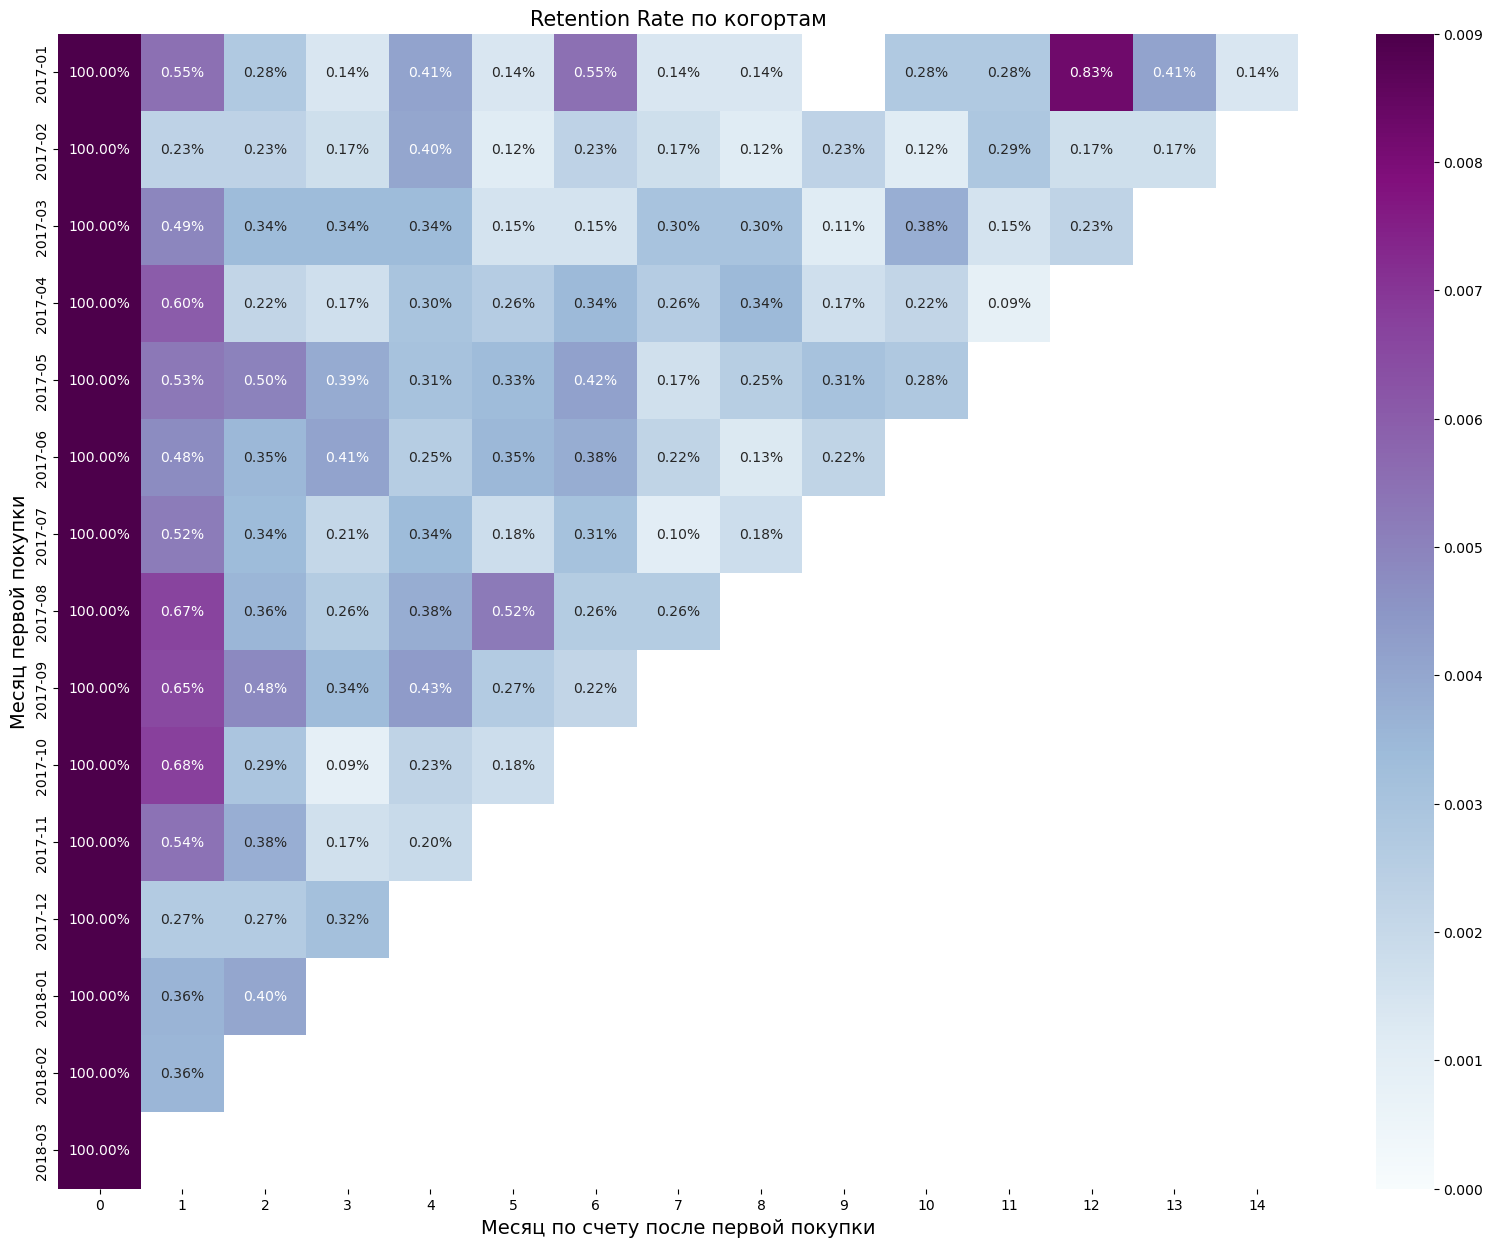

In [ ]:
plt.figure(figsize = (20, 15))
plt.title('Retention Rate по когортам', size= 15)
sns.heatmap(df_cohort_final_visual, vmin=0.0, vmax=0.009, cmap="BuPu", annot=True, fmt='.2%')
plt.xlabel('Месяц по счету после первой покупки',size= 14)
plt.ylabel('Месяц первой покупки', size= 14)
plt.show()

#### Судя по графику самая высокая возвращаемость при первой покупке это июнь 2017 года, на третий месяц retention rate составляет 0.41%


#### 6. Часто для качественного анализа аудитории использую подходы, основанные на сегментации. Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. В кластеризации можешь выбрать следующие метрики: R - время от последней покупки пользователя до текущей даты, F - суммарное количество покупок у пользователя за всё время, M - сумма покупок за всё время. Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров. Пример такого описания: RFM-сегмент 132 (recency=1, frequency=3, monetary=2) имеет границы метрик recency от 130 до 500 дней, frequency от 2 до 5 заказов в неделю, monetary от 1780 до 3560 рублей в неделю.

Чтобы получить оценку RFM клиента, нам нужно сначала рассчитать оценки R, F и M по шкале от 1 (худший) до 5 (лучший).

Recency : насколько недавно была совершена последняя покупка клиента.
Frequency : как часто клиент совершает покупку.
Monetary : сколько денег тратит клиент.

    рассчитать Recency = количество дней с момента последней покупки
    рассчитать Frequency = количество покупок за исследуемый период
    рассчитать Monetary = общая сумма покупок, сделанных за исследуемый период
    найти квинтили для каждого из этих измерений
    дайте оценку каждому параметру в зависимости от того, в каком квинтиле он находится
    объединить баллы R, F и M, чтобы получить балл RFM
    сопоставить оценки RF с сегментами
    
Нам понадобятся данные о клиентах, как часто они покупают и на какую сумму. Для этого нам потребуются все три таблицы. Объединим используемую ранее таблицу с данными без пропусков по оплате с таблицей товаров.

In [ ]:
df_all = df_id_orders.merge(df_products, on = 'order_id')
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112635 entries, 0 to 112634
Data columns (total 20 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    112635 non-null  object        
 1   customer_unique_id             112635 non-null  object        
 2   customer_zip_code_prefix       112635 non-null  int64         
 3   customer_city                  112635 non-null  object        
 4   customer_state                 112635 non-null  object        
 5   order_id                       112635 non-null  object        
 6   order_status                   112635 non-null  object        
 7   order_purchase_timestamp       112635 non-null  datetime64[ns]
 8   order_approved_at              112635 non-null  datetime64[ns]
 9   order_delivered_carrier_date   111441 non-null  datetime64[ns]
 10  order_delivered_customer_date  110181 non-null  datetime64[ns]
 11  

Уберем все данные об отмененных и недоступных заказах

In [ ]:
df_all = df_all.query('order_status != "canceled" and order_status !="unavailable"')

Оставим только нужные нам колонки

In [ ]:
df = df_all[['order_id', 'price', 'customer_unique_id', 'order_approved_at']]
df.head()

,order_id,price,customer_unique_id,order_approved_at
0,00e7ee1b050b8499577073aeb2a297a1,124.99,861eff4711a542e4b93843c6dd7febb0,2017-05-16 15:22:12
1,29150127e6685892b6eab3eec79f59c7,289.00,290c77bc529b7ac935b93aa66c333dc3,2018-01-12 20:58:32
2,b2059ed67ce144a36e2aa97d2c9e9ad2,139.94,060e732b5b29e8181a18229c7b0b2b5e,2018-05-20 16:19:10
3,951670f92359f4fe4a63112aa7306eba,149.94,259dac757896d24d7702b9acbbff3f3c,2018-03-13 17:29:19
4,6b7d50bd145f6fc7f33cebabd7e49d0f,230.00,345ecd01c38d18a9036ed96c73b8d066,2018-07-29 10:10:09


Нам будет нужна колонка с данными о количестве дней с момента покупки до последней фиксируемой даты.

In [ ]:
df['days_after_purchase'] = df['order_approved_at'].apply(lambda x: (df_orders.order_approved_at.max() - x).days)

In [ ]:
df.head()

,order_id,price,customer_unique_id,order_approved_at,days_after_purchase
0,00e7ee1b050b8499577073aeb2a297a1,124.99,861eff4711a542e4b93843c6dd7febb0,2017-05-16 15:22:12,475
1,29150127e6685892b6eab3eec79f59c7,289.00,290c77bc529b7ac935b93aa66c333dc3,2018-01-12 20:58:32,233
2,b2059ed67ce144a36e2aa97d2c9e9ad2,139.94,060e732b5b29e8181a18229c7b0b2b5e,2018-05-20 16:19:10,106
3,951670f92359f4fe4a63112aa7306eba,149.94,259dac757896d24d7702b9acbbff3f3c,2018-03-13 17:29:19,174
4,6b7d50bd145f6fc7f33cebabd7e49d0f,230.00,345ecd01c38d18a9036ed96c73b8d066,2018-07-29 10:10:09,36


Посмотрим на итоговую сумму покупки.

In [ ]:
df = df.groupby(['order_id','customer_unique_id','order_approved_at', 'days_after_purchase'], as_index=False) \
        .agg({'price':'sum'}) \
        .rename(columns={'price':'total'})
df

,order_id,customer_unique_id,order_approved_at,days_after_purchase,total
0,00010242fe8c5a6d1ba2dd792cb16214,871766c5855e863f6eccc05f988b23cb,2017-09-13 09:45:35,355,58.90
1,00018f77f2f0320c557190d7a144bdd3,eb28e67c4c0b83846050ddfb8a35d051,2017-04-26 11:05:13,495,239.90
2,000229ec398224ef6ca0657da4fc703e,3818d81c6709e39d06b2738a8d3a2474,2018-01-14 14:48:30,232,199.00
3,00024acbcdf0a6daa1e931b038114c75,af861d436cfc08b2c2ddefd0ba074622,2018-08-08 10:10:18,26,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,64b576fb70d441e8f1b2d7d446e483c5,2017-02-04 14:10:13,576,199.90
...,...,...,...,...,...
98180,fffc94f6ce00a00581880bf54a75a037,0c9aeda10a71f369396d0c04dce13a64,2018-04-25 04:11:01,131,299.99
98181,fffcd46ef2263f404302a634eb57f7eb,0da9fe112eae0c74d3ba1fe16de0988b,2018-07-17 04:31:48,48,350.00
98182,fffce4705a9662cd70adb13d4a31832d,cd79b407828f02fdbba457111c38e4c4,2017-10-24 17:14:25,314,99.90
98183,fffe18544ffabc95dfada21779c9644f,eb803377c9315b564bdedad672039306,2017-08-15 00:04:32,384,55.99


Делаем таблицу с данными RFM по каждому покупателю:

* время от последней покупки 'recency', 
* суммарное количество покупок 'frequency', 
* cумма покупок за все время 'monetary'

In [ ]:
df_rfm = df.groupby('customer_unique_id', as_index = False) \
            .agg({ 'days_after_purchase':'min', 'order_id': 'count', 'total': 'sum'}) \
            .rename(columns={'days_after_purchase':'recency','order_id':'frequency','total':'monetary'})

df_rfm.head()

,customer_unique_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,18.90
2,0000f46a3911fa3c0805444483337064,541,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,325,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,292,1,180.00


In [ ]:
df_rfm.describe()

,recency,frequency,monetary
count,94970.000000,94970.000000,94970.000000
mean,242.475519,1.033853,142.073605
std,152.952043,0.210801,216.085833
min,0.000000,1.000000,0.850000
25%,118.000000,1.000000,47.900000
50%,223.000000,1.000000,89.890000
75%,351.000000,1.000000,155.000000
max,718.000000,16.000000,13440.000000


Судя по первичной статистике новых данных наобходимо более детально рассмотреть frequency.

In [ ]:
df_rfm.frequency.nunique()

9

In [ ]:
df_rfm.frequency.unique()

array([ 1,  2,  3,  4,  6,  7,  5,  9, 16], dtype=int64)

In [ ]:
df_rfm.frequency.value_counts()

1     92084
2      2650
3       188
4        29
5         9
6         5
7         3
9         1
16        1
Name: frequency, dtype: int64

Ввиду того, что количество покупок чаще всего составляет одну, придется сегментировать frequency на основе количества покупок:
    
    1 - одна покупка
    2 - две покупки
    3 - три покупки
    4 - больше трёх покупок
    
recency и monetary можно сегментировать на основе квантилей распределения.

In [ ]:
quantiles = df_rfm.quantile(q=[0.25,0.5,0.75])
quantiles

,recency,frequency,monetary
0.25,118.0,1.0,47.90
0.50,223.0,1.0,89.89
0.75,351.0,1.0,155.00


In [ ]:
quantiles = quantiles.to_dict()
quantiles

{'recency': {0.25: 118.0, 0.5: 223.0, 0.75: 351.0},
 'frequency': {0.25: 1.0, 0.5: 1.0, 0.75: 1.0},
 'monetary': {0.25: 47.9, 0.5: 89.89, 0.75: 155.0}}

Границы метрик для ранжирования:
для recency:

1. - 352 и более дней
2. - 224-351 дней
3. - 119-223 дней
4. - 118 и менее дней 
       
для monetary валюта у нас не указана, но общемировой валютой на данный момент является доллар, поэтому примем его обозначение:

1. - до 48 долларов
2. - 48 до 89.9 долларов 
3. - 89.9 до 155 долларов 
4. - всё, что 155 долларов и больше

In [ ]:
def r_score(x):
    if x <= 118:
        return 4
    elif x <= 223:
        return 3
    elif x <= 351:
        return 2
    else:
        return 1
    
def m_score(x):
    if x < 48:
        return 1
    elif x < 89.9:
        return 2
    elif x < 155:
        return 3
    else:
        return 4  
    
def f_score(x):
    if x == 1:
        return 1
    elif x == 2:
        return 2
    elif x == 3:
        return 3
    else:
        return 4

In [ ]:
df_rfm['R'] = df_rfm['recency'].apply(lambda x: r_score(x))
df_rfm['F'] = df_rfm['frequency'].apply(lambda x: f_score(x))
df_rfm['M'] = df_rfm['monetary'].apply(lambda x: m_score(x))
df_rfm['RFM_Score'] = df_rfm['R'].map(str) + df_rfm['F'].map(str) + df_rfm['M'].map(str)
df_rfm.head()

,customer_unique_id,recency,frequency,monetary,R,F,M,RFM Score,RFM_Score
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,129.90,4,1,3,413,413
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,18.90,4,1,1,411,411
2,0000f46a3911fa3c0805444483337064,541,1,69.00,1,1,2,112,112
3,0000f6ccb0745a6a4b88665a16c9f078,325,1,25.99,2,1,1,211,211
4,0004aac84e0df4da2b147fca70cf8255,292,1,180.00,2,1,4,214,214


In [ ]:
print('Всего у нас получилось', df_rfm.RFM_Score.nunique(), 'сегмент')

Всего у нас получилось 51 сегмент


Посмотрим на список наших лучших клиентов, если такие присутствуют, у которых общая сумма покупок больше 155$, времени прошло с последней покупки меньше 118 дней и которые совершили 4 и более покупок. Смотреть будет в порядке убывания суммы потраченных денег.

In [ ]:
df_rfm.query('R == 4 and M == 4 and F == 4').sort_values('monetary', ascending = False)

,customer_unique_id,recency,frequency,monetary,R,F,M,RFM Score,RFM_Score
74392,c8460e4251689ba205045f3ea17884a1,25,4,4080.00,4,4,4,444,444
29646,4facc2e6fbc2bffab2fea92d2b4aa7e4,20,4,1686.90,4,4,4,444,444
21394,397b44d5bb99eabf54ea9c2b41ebb905,77,4,1650.00,4,4,4,444,444
94415,fe81bb32c243a86b2f86fbf053fe6140,74,5,1535.40,4,4,4,444,444
3359,08e5b38d7948d37fbb2a59fc5e175ab1,115,4,866.79,4,4,4,444,444
75195,ca77025e7201e3b30c44b472ff346268,93,7,806.61,4,4,4,444,444
52347,8d50f5eadf50201ccdcedfb9e2ac8455,13,16,729.62,4,4,4,444,444
81914,dc813062e0fc23409cd255f7f53c7074,11,6,687.76,4,4,4,444,444
59962,a1874c5550d2f0bc14cc122164603713,103,4,670.39,4,4,4,444,444
37369,6469f99c1f9dfae7733b25662e7f1782,67,7,664.20,4,4,4,444,444


In [ ]:
df_rfm.RFM_Score.value_counts(normalize = True).head(20)

111    0.064210
311    0.063652
212    0.063399
411    0.062967
413    0.061946
313    0.061851
112    0.061798
213    0.060208
211    0.059998
412    0.059882
114    0.059040
312    0.058987
113    0.058597
214    0.058050
414    0.057534
314    0.057492
424    0.004644
324    0.004454
224    0.003906
124    0.003106
Name: RFM_Score, dtype: float64

Анализ всех 51 сегментов потребует большого количества времени. Распределим на меньшее количество групп уже имеющиеся сегменты

1. VIP-клиенты: Клиенты с высокими значениями во всех трех параметрах RFM (R4, F4, M4).
2. Одноразовые клиенты: Клиенты, которые сделали только одну покупку с низким значением Monetary и давно (R1-R4, F1, M1).
3. Лояльные клиенты: Клиенты, которые имеют высокую частоту покупок и средний или высокий Monetary, независимо от Recency (F3-F4, M3-M4).
4. Потенциальные лоялисты: Клиенты с высокой Recency, но низкой частотой покупок и средним или высоким Monetary (R4, F1-F2, M2-M4).
5. Перспективные клиенты: Клиенты с низкой Recency, высокой частотой покупок и средним или высоким Monetary (R1-R3, F3-F4, M2-M4).
6. Нельзя потерять: Клиенты с низкой Recency, низкой частотой покупок, но высоким Monetary (R1-R3, F1-F2, M3-M4).
7. Клиенты, требующие внимания: Клиенты с низкой частотой покупок и средним или низким Monetary, независимо от Recency (F1-F2, M1-M3).
8. Уснувшие неперспективные клиенты: Клиенты, с очень давним большим количеством дешевых покупок (R1, F3-F4, M1).
9. Новые клиенты: Клиенты с недавними покупками средней суммы затрат (R3-R4, F1-F4, M2-M3).

In [ ]:
segments = {
    r'[4][4][4]': 'VIP',
    r'[1-2][1][1]': 'Одноразовые клиенты',
    r'[1-4][3-4][3-4]': 'Лояльные клиенты',
    r'[3-4][1-2][3-4]': 'Потенциальные лоялисты',
    r'[1-3][3-4][2-4]': 'Перспективные клиенты',
    r'[1][3-4][1]': 'Уснувшие неперспективные клиенты',
    r'[3-4][1-4][2-3]': 'Новые клиенты',    
    r'[1-3][1-2][3-4]': 'Нельзя потерять',
    r'[1-4][1-2][1-3]': 'Клиенты, требующие внимания',
}

df_rfm['segment'] = df_rfm.RFM_Score.replace(segments, regex=True)
df_rfm.head()

,customer_unique_id,recency,frequency,monetary,R,F,M,RFM Score,RFM_Score,segment
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,129.90,4,1,3,413,413,Потенциальные лоялисты
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,18.90,4,1,1,411,411,"Клиенты, требующие внимания"
2,0000f46a3911fa3c0805444483337064,541,1,69.00,1,1,2,112,112,"Клиенты, требующие внимания"
3,0000f6ccb0745a6a4b88665a16c9f078,325,1,25.99,2,1,1,211,211,Одноразовые клиенты
4,0004aac84e0df4da2b147fca70cf8255,292,1,180.00,2,1,4,214,214,Нельзя потерять


Посмотрим, все ли сегменты мы затронули.

In [ ]:
df_rfm.segment.unique()

array(['Потенциальные лоялисты', 'Клиенты, требующие внимания',
       'Одноразовые клиенты', 'Нельзя потерять', 'Новые клиенты',
       'Лояльные клиенты', 'VIP', 'Перспективные клиенты',
       'Уснувшие неперспективные клиенты'], dtype=object)

А теперь посмотрим, как распределились клиенты по нашей новой сегментации

In [ ]:
df_rfm.segment.value_counts()

Клиенты, требующие внимания         24205
Потенциальные лоялисты              23879
Нельзя потерять                     23383
Одноразовые клиенты                 11796
Новые клиенты                       11475
Лояльные клиенты                      198
VIP                                    23
Перспективные клиенты                   7
Уснувшие неперспективные клиенты        4
Name: segment, dtype: int64

Визуализируем полученные данные по количеству человек, приходящихся на каждый сегмент.

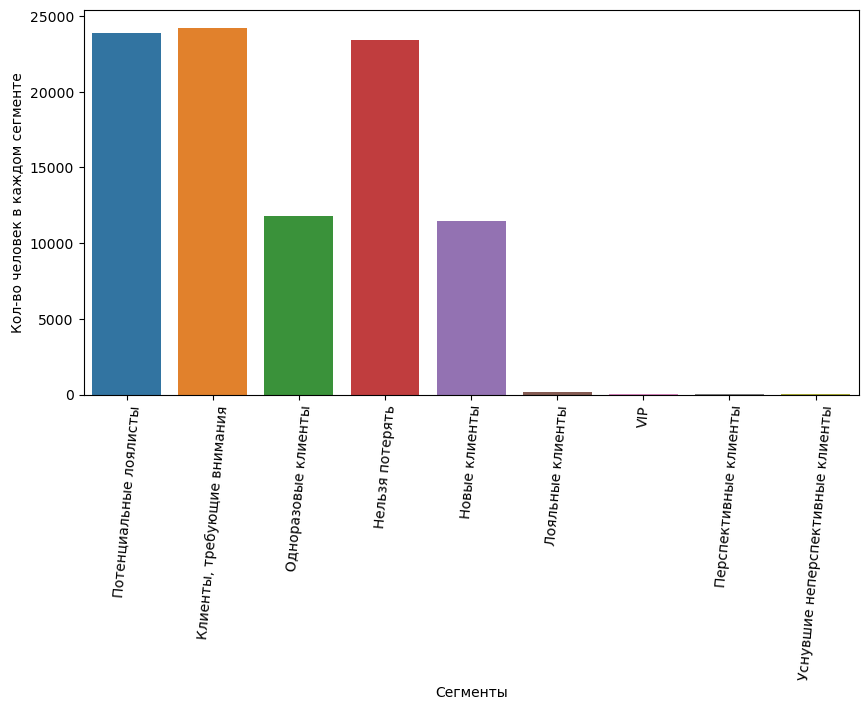

In [ ]:
plt.figure(figsize = (10, 5))
ax = sns.countplot(data = df_rfm, x = "segment")
plt.xticks(rotation = 85)
ax.set_xlabel("Сегменты")
ax.set_ylabel("Кол-во человек в каждом сегменте")
plt.show()

Теперь визуализируем данные в разрезе сегментов, но по количеству денег принесенных клиентами.

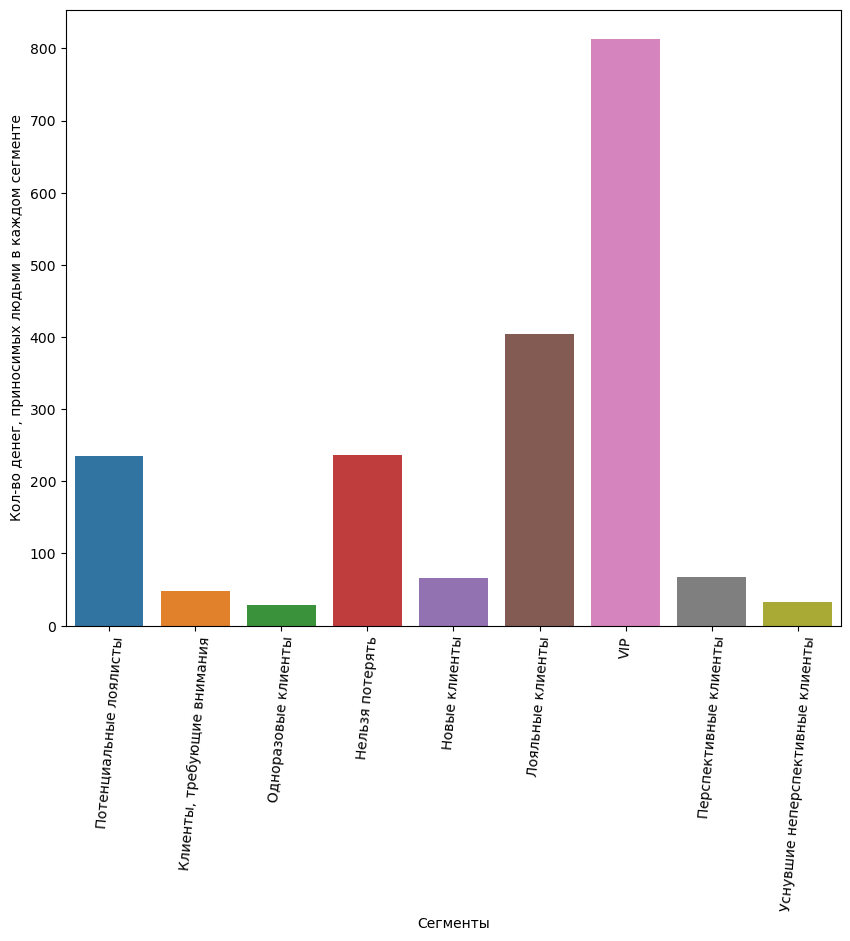

In [ ]:
plt.figure(figsize = (10, 8))
ax = sns.barplot(data = df_rfm, x = "segment", y = "monetary", errorbar = None)
plt.xticks(rotation = 85)
ax.set_xlabel("Сегменты")
ax.set_ylabel("Кол-во денег, приносимых людьми в каждом сегменте")
plt.show()

#### Мы сделали анализ за 2 года по имеющимся у нас данным. Больше всего клиенты, требующие внимания (24205 человек), потенциальных лоялистов (23879 человек) и клиентов , которых нельзя потерять (23383 человек). Для всех этих сегментов подойдёт показ дополнительной рекламы и проведение каких-либо акций как минимум для поддержания действующего или угасающего интереса.
#### Далее у нас идут одноразовые клиенты (11796 человек) и новые клиенты (11475 человек). 
#### Больше всего людей совершают покупку только один раз и медианная цена товара составляет примерно 90 долларов, из чего следует, что организация продает товары, которые не требуется часто менять, либо магазин не очень лоялен к своим клиентам.
#### Наибольшую прибыль компании приносят vip клиенты, потом идут лояльные клиенты, третью позицию делят практически на равных потенциальные лоялисты и клиенты, которых нельзя потерять.